## Importing Libraries

In [82]:
# import the basic Libraries

import pandas as pd
import numpy as np

# For data Visualization 

import seaborn as sns
import matplotlib.pyplot as plt

# For Chart size

plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize' : [16,8]} , font_scale=1.8)


## Reading Dataset

In [83]:
# read the dataset

df = pd.read_csv('Dataset/movie_metadata.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [84]:
# dataset shape

df.shape

(5043, 28)

In [85]:
# remove unnecessary columns 

df = df.drop(['color',
         'director_facebook_likes',
          'actor_3_facebook_likes',
         'director_facebook_likes' ,
         'actor_1_facebook_likes',
          'facenumber_in_poster' ,
         'cast_total_facebook_likes' ,
         'director_facebook_likes' ,
           'actor_3_facebook_likes',
         'actor_1_facebook_likes',
             'plot_keywords',
             'actor_2_facebook_likes',
             'aspect_ratio'],axis =1)
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year', 'imdb_score',
       'movie_facebook_likes'],
      dtype='object')

In [86]:
# columns info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           4939 non-null   object 
 1   num_critic_for_reviews  4993 non-null   float64
 2   duration                5028 non-null   float64
 3   actor_2_name            5030 non-null   object 
 4   gross                   4159 non-null   float64
 5   genres                  5043 non-null   object 
 6   actor_1_name            5036 non-null   object 
 7   movie_title             5043 non-null   object 
 8   num_voted_users         5043 non-null   int64  
 9   actor_3_name            5020 non-null   object 
 10  movie_imdb_link         5043 non-null   object 
 11  num_user_for_reviews    5022 non-null   float64
 12  language                5031 non-null   object 
 13  country                 5038 non-null   object 
 14  content_rating          4740 non-null   

## Missing Values

In [87]:
# check the columns having missing values

df.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
movie_imdb_link             0
num_user_for_reviews       21
language                   12
country                     5
content_rating            303
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [88]:
# 'gross' and 'budget' columns have large number of NaN values, drop all the rows with NaNs at this column

df = df[~np.isnan(df['gross'])]
df = df[~np.isnan(df['budget'])]

In [89]:
# using (mean) for missing numeric Columns 

df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mean(),inplace =True)
df['duration'].fillna(df['duration'].mean() , inplace = True)

# replace the missing  actor names with "Unknown Actor"

df['actor_1_name'].fillna('Unknown Actor' , inplace = True)
df['actor_2_name'].fillna('Unknown Actor' , inplace = True)
df['actor_3_name'].fillna('Unknown Actor' , inplace = True)


# Using (mode) for Categorical column

df['language'].fillna(df['language'].mode()[0] , inplace = True)
df['content_rating'].fillna(df['content_rating'].mode()[0] , inplace = True)


# let's check again null values

df.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
movie_imdb_link           0
num_user_for_reviews      0
language                  0
country                   0
content_rating            0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

## Feature Engineering

In [90]:
# Convert budget and gross to make analysis easier

df['gross'] = df['gross']/1000000
df['budget'] = df['budget']/1000000

# Create a column called profit from (gross , budget)

df['profit'] = df['gross'] - df['budget']

In [91]:
# Top 10 Profit of Movies

df[['movie_title','profit']].sort_values('profit' , ascending = False).head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
794,The Avengers,403.279547
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061


In [92]:
# to remove duplicates in df

df.drop_duplicates(keep = 'first',inplace = True)

In [93]:
# check again after removing dublicate 

df[['movie_title','profit']].sort_values('profit' , ascending = False).head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [94]:
# check values of "Language" Column
df['language'].value_counts()

English       3676
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Thai             3
Persian          3
Danish           3
Hebrew           3
Dutch            3
Indonesian       2
Aboriginal       2
Dari             2
Icelandic        1
Russian          1
Czech            1
Swedish          1
Hungarian        1
Mongolian        1
Telugu           1
Vietnamese       1
Arabic           1
Filipino         1
Dzongkha         1
Zulu             1
Maya             1
Romanian         1
Aramaic          1
Kazakh           1
None             1
Bosnian          1
Name: language, dtype: int64

In [95]:
# Better to keep only two languages that is English and Foreign

df['language']=df['language'].apply(lambda x : 'English ' if x == 'English' else 'Foreign')
df['language'].value_counts()

English     3676
Foreign      180
Name: language, dtype: int64

In [96]:
# we can categorize the movies in two part (long , short)

df['duration'] = df['duration'].apply(lambda x : 'Long' if x >= 120 else 'Short')

In [97]:
# Extract top four movies genres in separate columns

df['genres'] = df['genres'].str.split('|')
df['genre1'] =  df['genres'].apply(lambda x : x[0])

# Some of the movies have only one genre. In such cases, assign the first same genre

df['genre2'] = df['genres'].apply(lambda x : x[1] if len(x) > 1 else x[0])
df['genre3'] = df['genres'].apply(lambda x : x[2] if len(x) > 2 else x[0])
df['genre4'] = df['genres'].apply(lambda x : x[3] if len(x) > 3 else x[0])

# check

df[['genres' , 'genre1', 'genre2' ,'genre3' ,'genre4']].head()

,genres,genre1,genre2,genre3,genre4
0,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi
1,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action
2,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action
3,"[Action, Thriller]",Action,Thriller,Action,Action
5,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action


                              movie_title  Social_Media_Popularity
10    Batman v Superman: Dawn of Justice               1599.794424
150                         Ghostbusters               1076.336425
1582                        Ghostbusters               1075.827482
96                          Interstellar               1024.560802
3015               10 Days in a Madhouse                828.025478
945                       Into the Woods                692.937200
73                         Suicide Squad                652.816996
1190                Fifty Shades of Grey                624.306881
108                             Warcraft                622.790277
92          Independence Day: Resurgence                599.274128


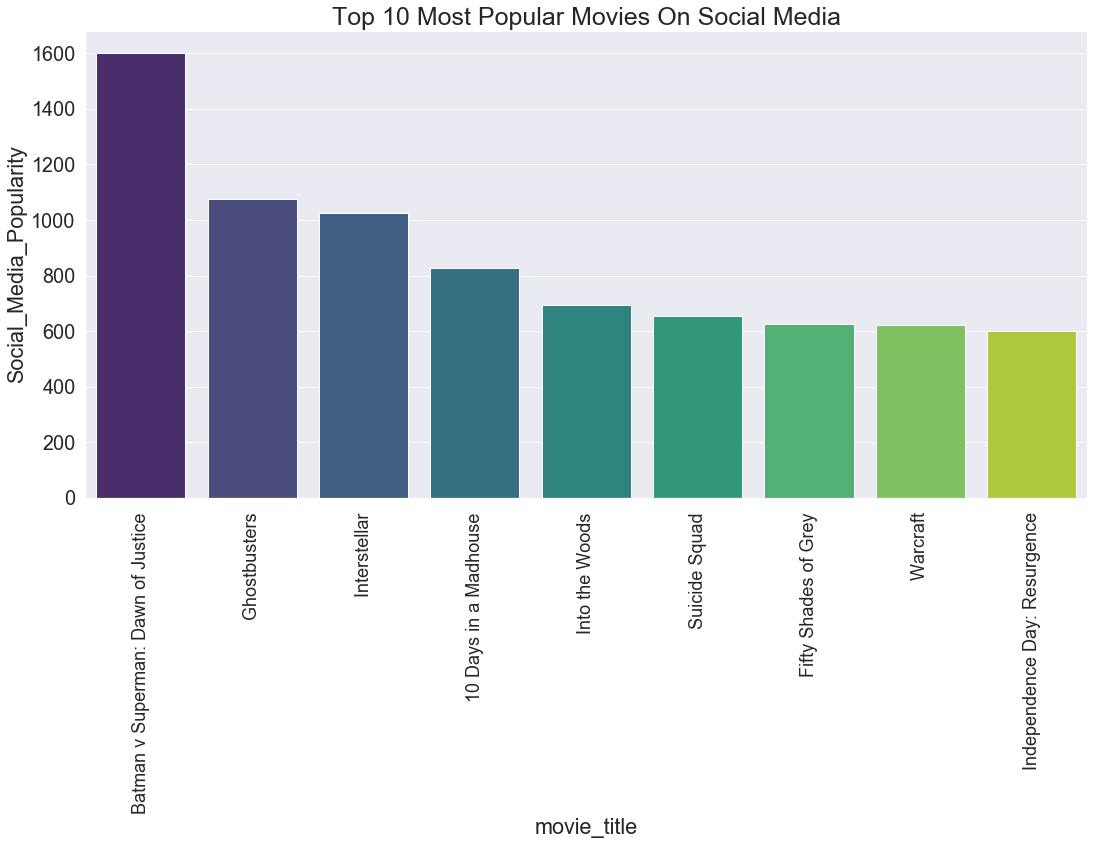

In [98]:
# calculate (Social_Media_Popularity) from (num_user_for_reviews) , (num_voted_users) and (movie_facebook_likes)

df['Social_Media_Popularity'] = ((df['num_user_for_reviews']/df['num_voted_users']) * df['movie_facebook_likes'])

# assign x is equal Top 10 Most Popular Movies on Social Media

x = df[['movie_title' ,'Social_Media_Popularity']].sort_values('Social_Media_Popularity' , ascending = False).head(10)

print(x)

sns.barplot(x['movie_title'] , x['Social_Media_Popularity'] , palette='viridis')
plt.title('Top 10 Most Popular Movies On Social Media' , fontsize = 25)
plt.xticks(rotation = 90  , fontsize =18 )
plt.show()

gross                      
                    max        mean       min
genre1                                       
Action       760.505847   76.584686  0.000162
Adventure    436.471036   87.827145  0.004091
Animation    368.049635   89.873480  0.071442
Biography    255.950375   36.431983  0.012836
Comedy       329.691196   37.611935  0.000703
Crime        183.405771   32.223226  0.001111
Documentary  119.078393   12.749187  0.002245
Drama        658.672302   30.778967  0.002580
Family       434.949459  149.160478  2.119994
Fantasy      100.614858   40.483059  0.003478
Horror       204.565000   34.737117  0.005725
Musical      181.360000   92.084000  2.808000
Mystery      217.536138   48.822296  0.016066
Romance       62.453315   20.886339  0.076382
Sci-Fi        79.568000   26.071841  0.018195
Thriller       0.070071    0.040513  0.002468
Western       41.400000   15.914589  0.243768

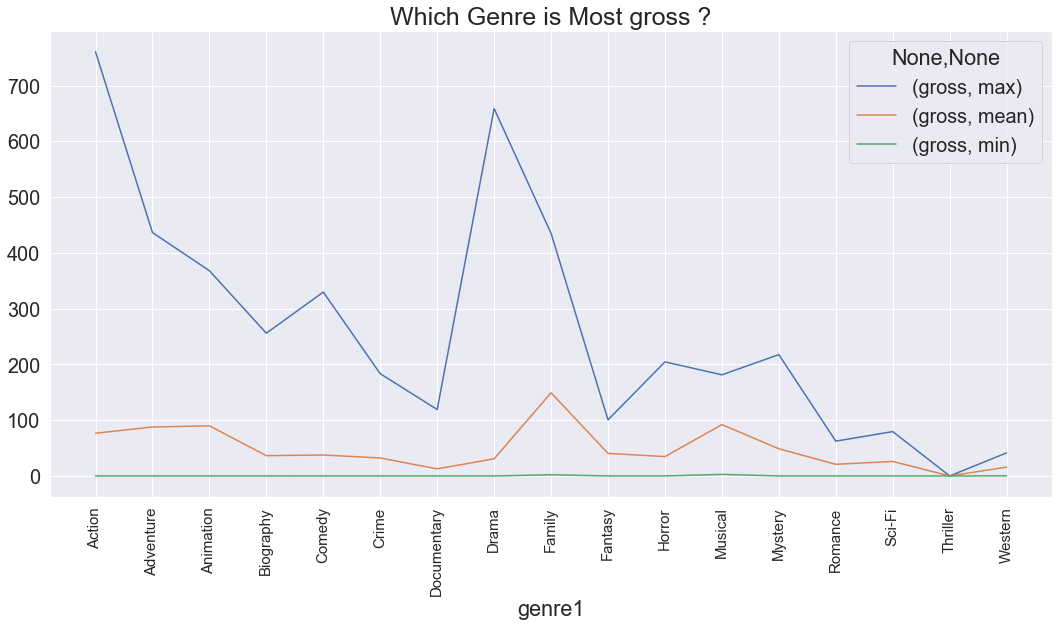

In [99]:
y= df[['genre1','gross']].groupby(['genre1']).agg(['max' , 'mean' ,'min'])
display(y)
y.plot(kind = 'line')
plt.xticks(np.arange(17),['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'],rotation = 90, fontsize = 15)
plt.title('Which Genre is Most gross ?',fontsize = 25)

plt.show()

### The Most Profitable Movie from each Genre


In [100]:
# The Most Profitable Movie from each Genre

df[['genre1','movie_title','profit']].groupby(['genre1']).max()

,movie_title,profit
genre1,,
Action,Æon Flux,523.505847
Adventure,Zombieland,377.783777
Animation,Waltz with Bashir,292.049635
Biography,Woman in Gold,226.950375
Comedy,Zoolander,274.691196
Crime,Zodiac,128.821952
Documentary,Woodstock,113.078393
Drama,Zero Dark Thirty,458.672302
Family,The Nutcracker,424.449459


In [101]:
# convert year into integer

df['title_year'] = df['title_year'].astype(int)

# Most Profitable Years in Box Office

Z = df[['language', 'title_year' ,'profit']].groupby(['language','title_year']).agg('sum').sort_values('profit', ascending = False).head(10)


_____Most Profitable Years in Box Office____


profit
language title_year             
English  2014        2729.797944
         2012        2701.504634
         2015        2364.554417
         2002        2268.274235
         2009        2133.449256
         2013        2080.782304
         2003        1924.411513
         2007        1754.855579
         2001        1666.701327
         1994        1600.413059

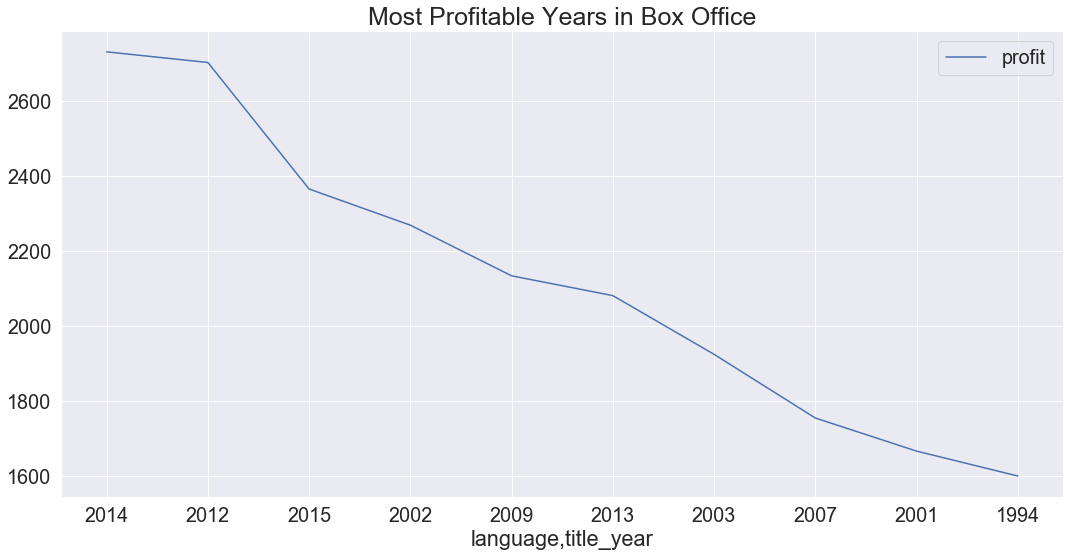

In [102]:
print('_____Most Profitable Years in Box Office____')
display(Z)
Z.plot(kind = 'line')
plt.xticks(np.arange(10),[2014,2012,2015,2002,2009,2013,2003,2007,2001,1994])
plt.title('Most Profitable Years in Box Office',fontsize = 25)
plt.show()

In [103]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year', 'imdb_score',
       'movie_facebook_likes', 'profit', 'genre1', 'genre2', 'genre3',
       'genre4', 'Social_Media_Popularity'],
      dtype='object')

### Top 5 Movies that Made Huge Losses

In [104]:
print('____Movies that Made Huge Losses____')
df[['movie_title','language','profit' ]].sort_values('profit').head(5)

____Movies that Made Huge Losses____


,movie_title,language,profit
2988,The Host,Foreign,-12213.298588
3859,Lady Vengeance,Foreign,-4199.788333
3005,Fateless,Foreign,-2499.804112
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510


### Top 5 profitable long movies

In [122]:
# Top 5 profitable long movies

df[df['duration']=='Long'][['movie_title' , 'duration' , 'gross' ,'profit']].sort_values('profit' , ascending = False).head(5)

,movie_title,duration,gross,profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
3080,E.T. the Extra-Terrestrial,Long,434.949459,424.449459


###  Top 5 Profitable Short Movies 

In [115]:
# top 5 profitable short movies 

df[df['duration']=='Short'][['movie_title' , 'duration' , 'gross' ,'profit']].sort_values('profit' , ascending = False).head(5)

,movie_title,duration,gross,profit
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870
582,Shrek 2,Short,436.471036,286.471036


Text(0.5, 1.0, 'Gross Between Long and Short Movies')

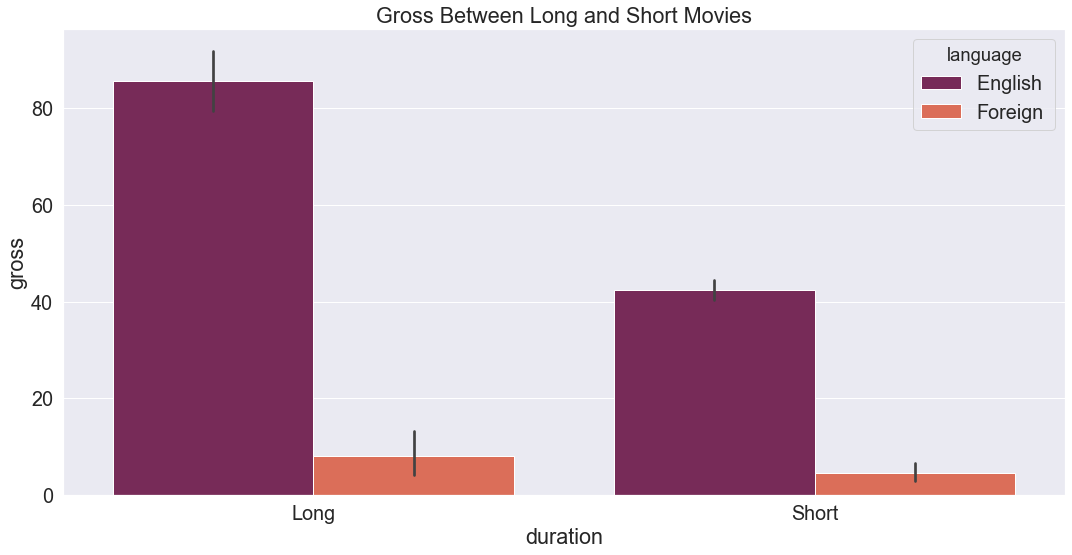

In [123]:
# Gross Comparison
sns.barplot(x = 'duration' , y = 'gross' , data = df , hue ='language' ,palette = 'rocket')
plt.title('Gross Between Long and Short Movies')


,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,budget,title_year,imdb_score,movie_facebook_likes,profit,genre1,genre2,genre3,genre4,Social_Media_Popularity
0,James Cameron,723.0,Long,Joel David Moore,760.505847,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,Wes Studi,...,237.0,2009,7.9,33000,523.505847,Action,Adventure,Fantasy,Sci-Fi,113.723251
1,Gore Verbinski,302.0,Long,Orlando Bloom,309.404152,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,...,300.0,2007,7.1,0,9.404152,Action,Adventure,Fantasy,Action,0.000000
2,Sam Mendes,602.0,Long,Rory Kinnear,200.074175,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,Stephanie Sigman,...,245.0,2015,6.8,85000,-44.925825,Action,Adventure,Thriller,Action,306.269665
3,Christopher Nolan,813.0,Long,Christian Bale,448.130642,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,...,250.0,2012,8.5,164000,198.130642,Action,Thriller,Action,Action,387.092264
5,Andrew Stanton,462.0,Long,Samantha Morton,73.058679,"[Action, Adventure, Sci-Fi]",Daryl Sabara,John Carter,212204,Polly Walker,...,263.7,2012,6.6,24000,-190.641321,Action,Adventure,Sci-Fi,Action,83.466853


In [139]:
print('Average IMDB Score for Long Duration Movies is : {0:.2f}'.format(df[df['duration']=='Long']['imdb_score'].mean()))
print('Average IMDB Score for Short Duration Movies is : {0:.2f}'.format(df[df['duration']=='Short']['imdb_score'].mean()))

Average IMDB Score for Long Duration Movies is : 7.05
Average IMDB Score for Short Duration Movies is : 6.26



Highest Rated Long Duration Movie

                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3


Highest Rated Short Duration Movie

               movie_title  imdb_score
3592  The Usual Suspects          8.6


Text(0.5, 1.0, 'IMDB_Score Vs Duration')

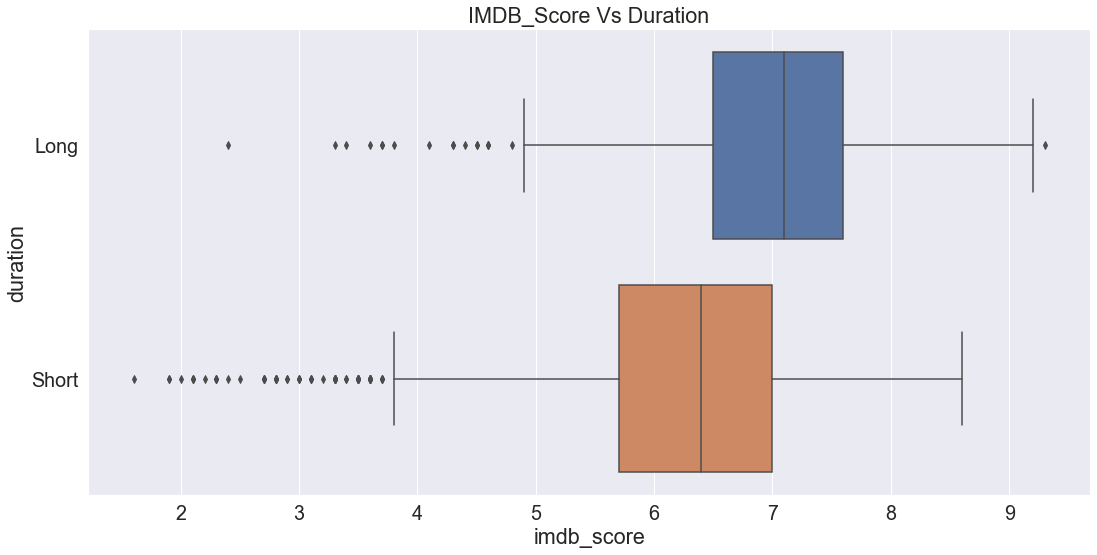

In [167]:
print( "\nHighest Rated Long Duration Movie\n\n" ,df[df['duration']=='Long'][['movie_title','imdb_score']].sort_values('imdb_score' , ascending = False ).head(1))
print( "\n\nHighest Rated Short Duration Movie\n\n" ,df[df['duration']=='Short'][['movie_title','imdb_score']].sort_values('imdb_score' , ascending = False ).head(1))

sns.boxplot(y = 'duration' , x = 'imdb_score' , data = df )
plt.title('IMDB_Score Vs Duration')

In [168]:
def actor(x) :
    a = df[df['actor_1_name']==x]
    b = df[df['actor_2_name']==x]
    c = df[df['actor_3_name']==x]
    a.append()

In [140]:
df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year', 'imdb_score',
       'movie_facebook_likes', 'profit', 'genre1', 'genre2', 'genre3',
       'genre4', 'Social_Media_Popularity'],
      dtype='object')